In [2]:
import sympy

In [3]:
sympy.init_printing()

In [4]:
c, x, y, θ, ξ, δ, α = sympy.symbols('c x y theta xi delta alpha') 

# Parabolic Airfoil

In [5]:
y1 = 4*δ*ξ/c*(1-ξ/c)

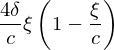

In [6]:
y1

In [7]:
yd1 = sympy.simplify(sympy.diff(y1,ξ))

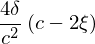

In [8]:
yd1

In [9]:
t1 = sympy.Function('t_1')(θ)

t1 = c/2*(1-sympy.cos(θ))

In [10]:
y1t = sympy.simplify(y1.subs(ξ,t1))
yd1t = sympy.simplify(yd1.subs(ξ,t1))

In [11]:
A0 = α - 1/sympy.pi * sympy.integrate(yd1t,(θ,0,sympy.pi))

In [12]:
A0

In [13]:
n = sympy.symbols('n', integer=True, positive=True)

In [14]:
An = sympy.simplify(2/sympy.pi * sympy.integrate(yd1t*sympy.cos(n*θ),(θ,0,sympy.pi)))

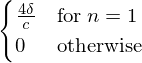

In [15]:
An

# Flat plate with slat and flap

In [16]:
η1, η2, ξ_le, ξ_te, θ_le, θ_te = sympy.symbols('eta_1 eta_2 xi_le xi_te theta_le theta_te')

In [17]:
y2 = sympy.Piecewise((η1*(ξ-ξ_le), ξ<=ξ_le ),(0, ξ<=ξ_te),( η2*(ξ-ξ_te),ξ<=c))

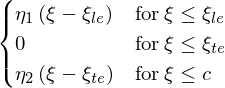

In [18]:
y2

In [19]:
yd2 = sympy.diff(y2,ξ)

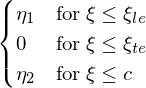

In [20]:
yd2

In [21]:
y2t = sympy.simplify(y2.subs([(ξ,t1),(ξ_le,t1.subs(θ,θ_le)),(ξ_te,t1.subs(θ,θ_te))]))
#yd2t = sympy.simplify(yd2.subs([(ξ,t1),(ξ_le,t1.subs(θ,θ_le)),(ξ_te,t1.subs(θ,θ_te))]))

q1 = 0.1
q2 = 0.8

yd2t = sympy.Piecewise((η1, θ<q1*sympy.pi ),(0, θ<=q2*sympy.pi),( η2, θ<=sympy.pi))

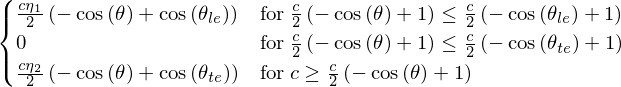

In [22]:
y2t

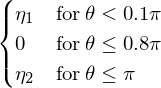

In [23]:
yd2t

In [24]:
A0_2 = α - 1/sympy.pi * sympy.integrate(yd2t,(θ,0,sympy.pi))

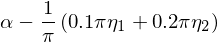

In [25]:
A0_2

In [26]:
An_2 = sympy.simplify(2/sympy.pi * sympy.integrate(yd2t*sympy.cos(n*θ),(θ,0,sympy.pi)))

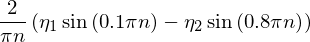

In [27]:
An_2

# NACA 4 digits

In [37]:
m, p, θ1 = sympy.symbols('m p theta_1')

In [29]:
# NACA 24XX

#m = 0.02
p1 = 0.4

θs = sympy.acos(1-2*p1)

In [30]:
yd3 = sympy.Piecewise((2*m/p**2*(p-(1-sympy.cos(θ))/2 ),θ<=θs),( 2*m/(1-p**2)*(p-(1-sympy.cos(θ))/2 ),θ<=sympy.pi ))

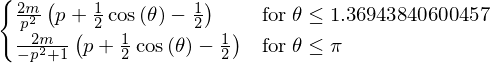

In [31]:
yd3

In [32]:
A0_3 = α - sympy.simplify(1/sympy.pi * sympy.integrate(yd3,(θ,0,sympy.pi)))

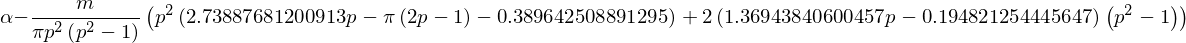

In [33]:
A0_3

In [34]:
An_3 = sympy.simplify(2/sympy.pi * sympy.integrate(yd3*sympy.cos(n*θ),(θ,0,sympy.pi)))

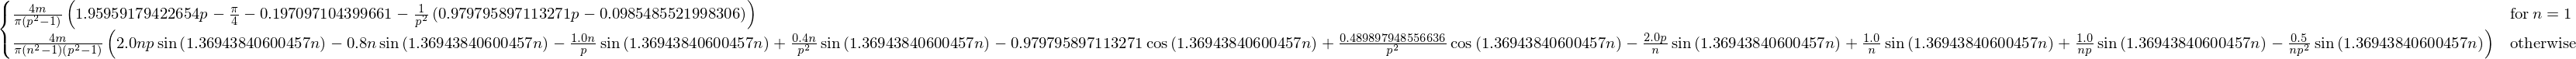

In [35]:
An_3

In [36]:
yd3a = 2*m/p**2*(p-(1-sympy.cos(θ))/2)

yd3b = 2*m/(1-p**2)*(p-(1-sympy.cos(θ))/2)                

In [42]:
A0_3ab = α-sympy.simplify(1/sympy.pi*(sympy.integrate(yd3a,(θ,0,θ1)) + sympy.integrate(yd3b,(θ,θ1,sympy.pi))))

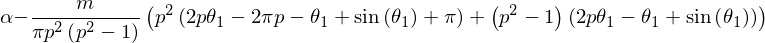

In [43]:
A0_3ab

In [44]:
An_3ab = sympy.simplify(2/sympy.pi * ( sympy.integrate(yd3a*sympy.cos(n*θ),(θ,0,θ1)) + 
                                       sympy.integrate(yd3b*sympy.cos(n*θ),(θ,θ1,sympy.pi)) ) )

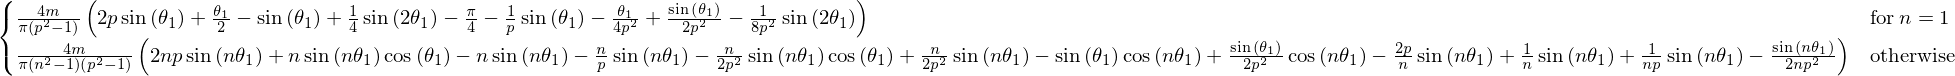

In [45]:
An_3ab

In [46]:
A0_3ab_p = α-sympy.simplify(1/sympy.pi*(sympy.integrate(yd3a,(θ,0,sympy.acos(1-p/5))) 
                                      + sympy.integrate(yd3b,(θ,sympy.acos(1-p/5),sympy.pi))))

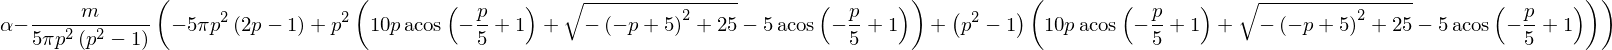

In [47]:
A0_3ab_p

In [48]:
An_3ab_p = sympy.simplify(2/sympy.pi * ( sympy.integrate(yd3a*sympy.cos(n*θ),(θ,0,sympy.acos(1-p/5))) + 
                                       sympy.integrate(yd3b*sympy.cos(n*θ),(θ,sympy.acos(1-p/5),sympy.pi)) ) )

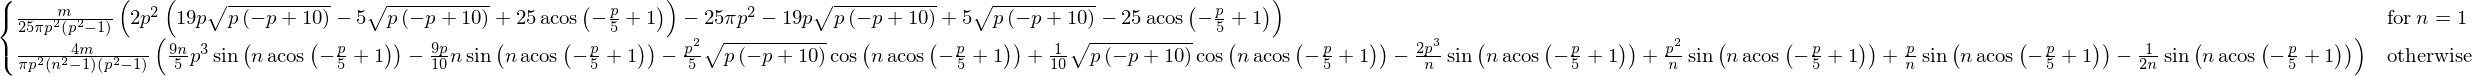

In [49]:
An_3ab_p

In [51]:
sympy.python(A0_3ab_p)

"alpha = Symbol('alpha')\nm = Symbol('m')\np = Symbol('p')\ne = alpha - m*(-5*pi*p**2*(2*p - 1) + p**2*(10*p*acos(-p/5 + 1) + sqrt(-(-p + 5)**2 + 25) - 5*acos(-p/5 + 1)) + (p**2 - 1)*(10*p*acos(-p/5 + 1) + sqrt(-(-p + 5)**2 + 25) - 5*acos(-p/5 + 1)))/(5*pi*p**2*(p**2 - 1))"

In [50]:
sympy.python(An_3ab_p)

'e = Piecewise((m*(2*p**2*(19*p*sqrt(p*(-p + 10)) - 5*sqrt(p*(-p + 10)) + 25*acos(-p/5 + 1)) - 25*pi*p**2 - 19*p*sqrt(p*(-p + 10)) + 5*sqrt(p*(-p + 10)) - 25*acos(-p/5 + 1))/(25*pi*p**2*(p**2 - 1)), Eq(n, 1)), (4*m*(9*n*p**3*sin(n*acos(-p/5 + 1))/5 - 9*n*p*sin(n*acos(-p/5 + 1))/10 - p**2*sqrt(p*(-p + 10))*cos(n*acos(-p/5 + 1))/5 + sqrt(p*(-p + 10))*cos(n*acos(-p/5 + 1))/10 - 2*p**3*sin(n*acos(-p/5 + 1))/n + p**2*sin(n*acos(-p/5 + 1))/n + p*sin(n*acos(-p/5 + 1))/n - sin(n*acos(-p/5 + 1))/(2*n))/(pi*p**2*(n**2 - 1)*(p**2 - 1)), True))'

In [35]:
r, k1 = sympy.symbols('r k_1')

In [36]:
# NACA 24XX

#5% standard	10	5	0.0580	361.400	
#10% standard	20	10	0.1260	51.640	
#15% standard	30	15	0.2025	15.957

#m = 0.02
r1 = 0.4

θs = sympy.acos(1-2*0.058)

In [37]:
yd4 = sympy.Piecewise(( (k1/6*(3*ξ**2-6*r*ξ+r**2*(3-r))).subs(ξ,t1),θ<=θs), \
                      ( (-k1*r**3/6), θ<=sympy.pi ))

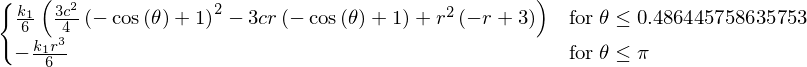

In [38]:
yd4

In [39]:
A0_4 = α - sympy.simplify(1/sympy.pi * sympy.integrate(yd4,(θ,0,sympy.pi)))

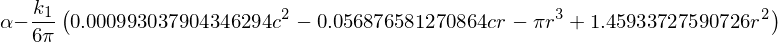

In [40]:
A0_4

In [41]:
An_4 = sympy.simplify(2/sympy.pi * sympy.integrate(yd4*sympy.cos(n*θ),(θ,0,sympy.pi)))

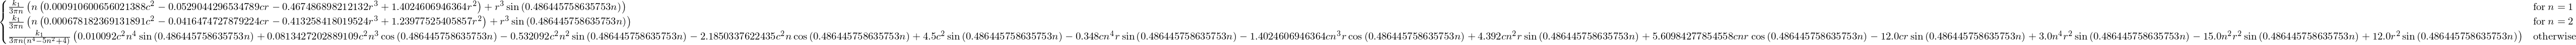

In [42]:
An_4

In [54]:
n1 = 5
#sympy.integrate(An_4.subs(n,n1)*sympy.sin(n1*θ),(θ,0,sympy.pi))
Bn_4 = sympy.simplify(sympy.integrate(An_4*sympy.sin(n*θ),(θ,0,sympy.pi)))

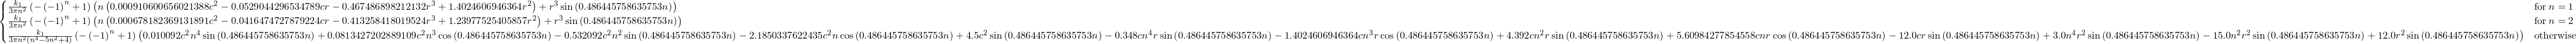

In [55]:
Bn_4

In [56]:
sympy.python(Bn_4)

'e = Piecewise((k_1*(-(-1)**n + 1)*(n*(0.000910600656021388*c**2 - 0.0529044296534789*c*r - 0.467486898212132*r**3 + 1.4024606946364*r**2) + r**3*sin(0.486445758635753*n))/(3*pi*n**2), Eq(n, 1)), (k_1*(-(-1)**n + 1)*(n*(0.000678182369131891*c**2 - 0.0416474727879224*c*r - 0.413258418019524*r**3 + 1.23977525405857*r**2) + r**3*sin(0.486445758635753*n))/(3*pi*n**2), Eq(n, 2)), (k_1*(-(-1)**n + 1)*(0.010092*c**2*n**4*sin(0.486445758635753*n) + 0.0813427202889109*c**2*n**3*cos(0.486445758635753*n) - 0.532092*c**2*n**2*sin(0.486445758635753*n) - 2.1850337622435*c**2*n*cos(0.486445758635753*n) + 4.5*c**2*sin(0.486445758635753*n) - 0.348*c*n**4*r*sin(0.486445758635753*n) - 1.4024606946364*c*n**3*r*cos(0.486445758635753*n) + 4.392*c*n**2*r*sin(0.486445758635753*n) + 5.60984277854558*c*n*r*cos(0.486445758635753*n) - 12.0*c*r*sin(0.486445758635753*n) + 3.0*n**4*r**2*sin(0.486445758635753*n) - 15.0*n**2*r**2*sin(0.486445758635753*n) + 12.0*r**2*sin(0.486445758635753*n))/(3*pi*n**2*(n**4 - 5*n**2 

In [57]:
sympy.python(A0_3)

"alpha = Symbol('alpha')\nm = Symbol('m')\np = Symbol('p')\ne = alpha - m*(p**2*(Float('2.7388768120091318', precision=53)*p - pi*(2*p - 1) + Float('-0.3896425088912947', precision=53)) + 2*(Float('1.3694384060045659', precision=53)*p + Float('-0.19482125444564735', precision=53))*(p**2 - 1))/(pi*p**2*(p**2 - 1))"

In [58]:
sympy.python(An_3)

'e = Piecewise((4*m*(1.95959179422654*p - pi/4 - 0.197097104399661 - (0.979795897113271*p - 0.0985485521998306)/p**2)/(pi*(p**2 - 1)), Eq(n, 1)), (4*m*(2.0*n*p*sin(1.36943840600457*n) - 0.8*n*sin(1.36943840600457*n) - 1.0*n*sin(1.36943840600457*n)/p + 0.4*n*sin(1.36943840600457*n)/p**2 - 0.979795897113271*cos(1.36943840600457*n) + 0.489897948556636*cos(1.36943840600457*n)/p**2 - 2.0*p*sin(1.36943840600457*n)/n + 1.0*sin(1.36943840600457*n)/n + 1.0*sin(1.36943840600457*n)/(n*p) - 0.5*sin(1.36943840600457*n)/(n*p**2))/(pi*(n**2 - 1)*(p**2 - 1)), True))'

In [59]:
sympy.python(A0_4)

"alpha = Symbol('alpha')\nk_1 = Symbol('k_1')\nc = Symbol('c')\nr = Symbol('r')\ne = alpha - k_1*(Float('0.00099303790434629446', precision=53)*c**2 - Float('0.056876581270864035', precision=53)*c*r - pi*r**3 + Float('1.4593372759072591', precision=53)*r**2)/(6*pi)"

In [60]:
sympy.python(An_4)

'e = Piecewise((k_1*(n*(0.000910600656021388*c**2 - 0.0529044296534789*c*r - 0.467486898212132*r**3 + 1.4024606946364*r**2) + r**3*sin(0.486445758635753*n))/(3*pi*n), Eq(n, 1)), (k_1*(n*(0.000678182369131891*c**2 - 0.0416474727879224*c*r - 0.413258418019524*r**3 + 1.23977525405857*r**2) + r**3*sin(0.486445758635753*n))/(3*pi*n), Eq(n, 2)), (k_1*(0.010092*c**2*n**4*sin(0.486445758635753*n) + 0.0813427202889109*c**2*n**3*cos(0.486445758635753*n) - 0.532092*c**2*n**2*sin(0.486445758635753*n) - 2.1850337622435*c**2*n*cos(0.486445758635753*n) + 4.5*c**2*sin(0.486445758635753*n) - 0.348*c*n**4*r*sin(0.486445758635753*n) - 1.4024606946364*c*n**3*r*cos(0.486445758635753*n) + 4.392*c*n**2*r*sin(0.486445758635753*n) + 5.60984277854558*c*n*r*cos(0.486445758635753*n) - 12.0*c*r*sin(0.486445758635753*n) + 3.0*n**4*r**2*sin(0.486445758635753*n) - 15.0*n**2*r**2*sin(0.486445758635753*n) + 12.0*r**2*sin(0.486445758635753*n))/(3*pi*n*(n**4 - 5*n**2 + 4)), True))'